In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('..\\sensor_data\\stand_still.txt', sep=',',header=None)
df.head()

,0,1,2,3,4
0,Rotation: -6.2608186620444055,Roll: -0.6553597653872715,Pitch: 27.080584787666893,Yaw: -14.198048770492308,Timestamp: 1754490888825
1,Rotation: -6.260645945481135,Roll: -0.6607951290098857,Pitch: 27.09369038712706,Yaw: -14.208183781036215,Timestamp: 1754490888815
2,Rotation: -6.260585484167251,Roll: -0.6628156989874572,Pitch: 27.102360979979252,Yaw: -14.216498455290214,Timestamp: 1754490888805
3,Rotation: -6.260610796761252,Roll: -0.6622312415632466,Pitch: 27.10791408518646,Yaw: -14.220827697307437,Timestamp: 1754490888795
4,Rotation: -6.260588572092504,Roll: -0.6629649886220053,Pitch: 27.11077145849073,Yaw: -14.220157252262613,Timestamp: 1754490888785


In [3]:
df = df.map(lambda x: float(str(x).split(":")[-1]) if isinstance(x, str) else x)
df.columns = ["Rotation", "Roll", "Pitch", "Yaw", "Timestamp"]

In [4]:
df.head()

,Rotation,Roll,Pitch,Yaw,Timestamp
0,-6.260819,-0.655360,27.080585,-14.198049,1.754491e+12
1,-6.260646,-0.660795,27.093690,-14.208184,1.754491e+12
2,-6.260585,-0.662816,27.102361,-14.216498,1.754491e+12
3,-6.260611,-0.662231,27.107914,-14.220828,1.754491e+12
4,-6.260589,-0.662965,27.110771,-14.220157,1.754491e+12


In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
df.index = df['Timestamp'].values
df.drop(columns=['Timestamp'],inplace=True)
df.head()

,Rotation,Roll,Pitch,Yaw
2025-08-06 14:34:48.825,-6.260819,-0.655360,27.080585,-14.198049
2025-08-06 14:34:48.815,-6.260646,-0.660795,27.093690,-14.208184
2025-08-06 14:34:48.805,-6.260585,-0.662816,27.102361,-14.216498
2025-08-06 14:34:48.795,-6.260611,-0.662231,27.107914,-14.220828
2025-08-06 14:34:48.785,-6.260589,-0.662965,27.110771,-14.220157


In [6]:
df.shape # rows and columns in the data

(2269, 4)

In [7]:
# check missing values
df.isnull().sum()

Rotation    0
Roll        0
Pitch       0
Yaw         0
dtype: int64

In [8]:
# summary of the data
df.describe()

,Rotation,Roll,Pitch,Yaw
count,2269.000000,2269.000000,2269.000000,2269.000000
mean,-4.461944,-0.453446,29.678650,-12.386134
std,2.809726,1.660599,2.938924,2.539187
min,-6.283125,-4.652338,14.698805,-18.372487
25%,-6.258826,-1.115219,27.982087,-13.682458
50%,-6.245002,-0.712489,29.978872,-12.319998
75%,-0.106426,0.158938,32.038928,-11.620515
max,-0.000031,9.750309,34.541844,-0.403549


<Axes: ylabel='Density'>

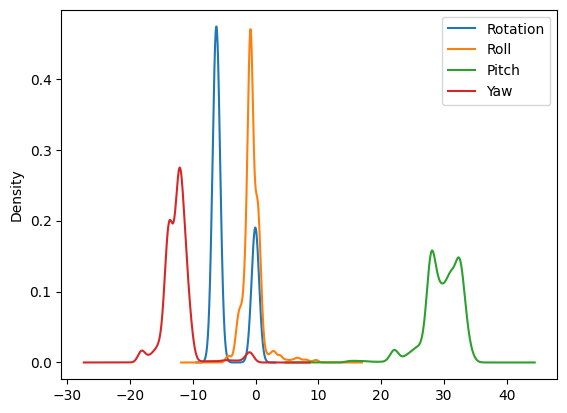

In [9]:
df.plot(kind='kde') # Distribution comparison of each column

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

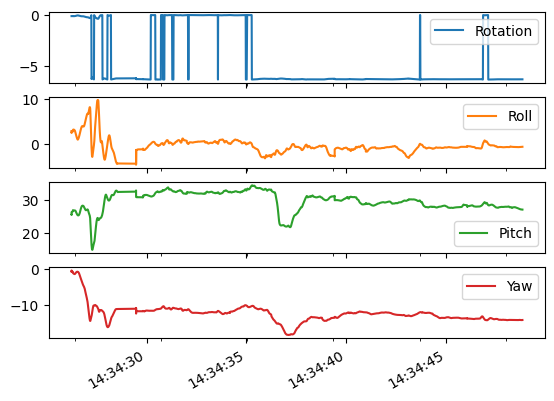

In [10]:
df.plot(subplots=True) # comparison of all the columns

In [11]:
# Correlation between all the columns
df.corr()

,Rotation,Roll,Pitch,Yaw
Rotation,1.000000,0.650941,0.213675,0.461293
Roll,0.650941,1.000000,-0.185751,0.410300
Pitch,0.213675,-0.185751,1.000000,0.164844
Yaw,0.461293,0.410300,0.164844,1.000000
